In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from geopy.distance import geodesic
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans

## Data Loading

In [253]:
# Load the standard and actual routes data
with open('Dataset/standard_routes.json', 'r') as file:
    standard_routes = json.load(file)

with open('Dataset/actual_routes.json', 'r') as file:
    actual_routes = json.load(file)

#### Sample Data Exploration

In [254]:
# Analyzing the structure of the data
structure_standard = {"total_routes": len(standard_routes), "example_route": standard_routes[0]}
structure_actual = {"total_routes": len(actual_routes), "example_route": actual_routes[0]}

In [255]:
structure_standard

{'total_routes': 50,
 'example_route': {'id': 's1',
  'route': [{'from': 'Pescara',
    'to': 'Terni',
    'merchandise': {'pens': 7, 'coca-cola': 25}},
   {'from': 'Terni',
    'to': 'Rome',
    'merchandise': {'coca-cola': 30, 'bread': 32}},
   {'from': 'Rome', 'to': 'Perugia', 'merchandise': {'pens': 30, 'honey': 18}},
   {'from': 'Perugia', 'to': 'Forlì', 'merchandise': {'butter': 18}},
   {'from': 'Forlì',
    'to': 'Bologna',
    'merchandise': {'coca-cola': 43, 'butter': 12}},
   {'from': 'Bologna',
    'to': 'Prato',
    'merchandise': {'tomatoes': 4, 'bread': 15, 'coca-cola': 23}}]}}

In [256]:
structure_actual

{'total_routes': 656,
 'example_route': {'id': 'a61038',
  'driver': 'D38',
  'route': [{'from': 'Pescara',
    'to': 'Terni',
    'merchandise': {'pens': 7, 'coca-cola': 25}},
   {'from': 'Terni',
    'to': 'Latina',
    'merchandise': {'coca-cola': 30, 'bread': 35}},
   {'from': 'Latina',
    'to': 'Perugia',
    'merchandise': {'pens': 30, 'honey': 12}},
   {'from': 'Perugia', 'to': 'Forlì', 'merchandise': {'butter': 18}},
   {'from': 'Forlì',
    'to': 'Bologna',
    'merchandise': {'coca-cola': 43, 'butter': 12}},
   {'from': 'Bologna',
    'to': 'Prato',
    'merchandise': {'tomatoes': 4, 'bread': 15, 'coca-cola': 23}}],
  'sroute': 's1'}}

## Data Analysis

In [257]:
# Converting the data into a dataframe
standard_routes_df = pd.DataFrame(standard_routes)
actual_routes_df = pd.DataFrame(actual_routes)

In [258]:
standard_routes_df.head(50)

,id,route
0,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi..."
1,s2,"[{'from': 'Latina', 'to': 'Salerno', 'merchand..."
2,s3,"[{'from': 'Bergamo', 'to': 'Monza', 'merchandi..."
3,s4,"[{'from': 'Venice', 'to': 'Udine', 'merchandis..."
4,s5,"[{'from': 'Bologna', 'to': 'Forlì', 'merchandi..."
5,s6,"[{'from': 'Rimini', 'to': 'Forlì', 'merchandis..."
6,s7,"[{'from': 'Turin', 'to': 'Genoa', 'merchandise..."
7,s8,"[{'from': 'Padova', 'to': 'Bologna', 'merchand..."
8,s9,"[{'from': 'Novara', 'to': 'Piacenza', 'merchan..."
9,s10,"[{'from': 'Naples', 'to': 'Pescara', 'merchand..."


In [259]:
actual_routes_df.head(50)

,id,driver,route,sroute
0,a61038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
1,a64038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
2,a66586,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
3,a4774,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
4,a75494,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
5,a17114,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
6,a94472,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
7,a78407,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
8,a98081,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1
9,a81263,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1


In [260]:
# Finding the number of actual routes for each driver and standard route
actual_routes_count = actual_routes_df.groupby(['driver', 'sroute']).size().reset_index(name='count')
actual_routes_count

,driver,sroute,count
0,D1,s45,10
1,D10,s8,7
2,D11,s25,9
3,D12,s29,18
4,D13,s2,10
5,D14,s24,7
6,D15,s15,14
7,D16,s22,7
8,D17,s39,12
9,D18,s28,5


<Axes: xlabel='driver'>

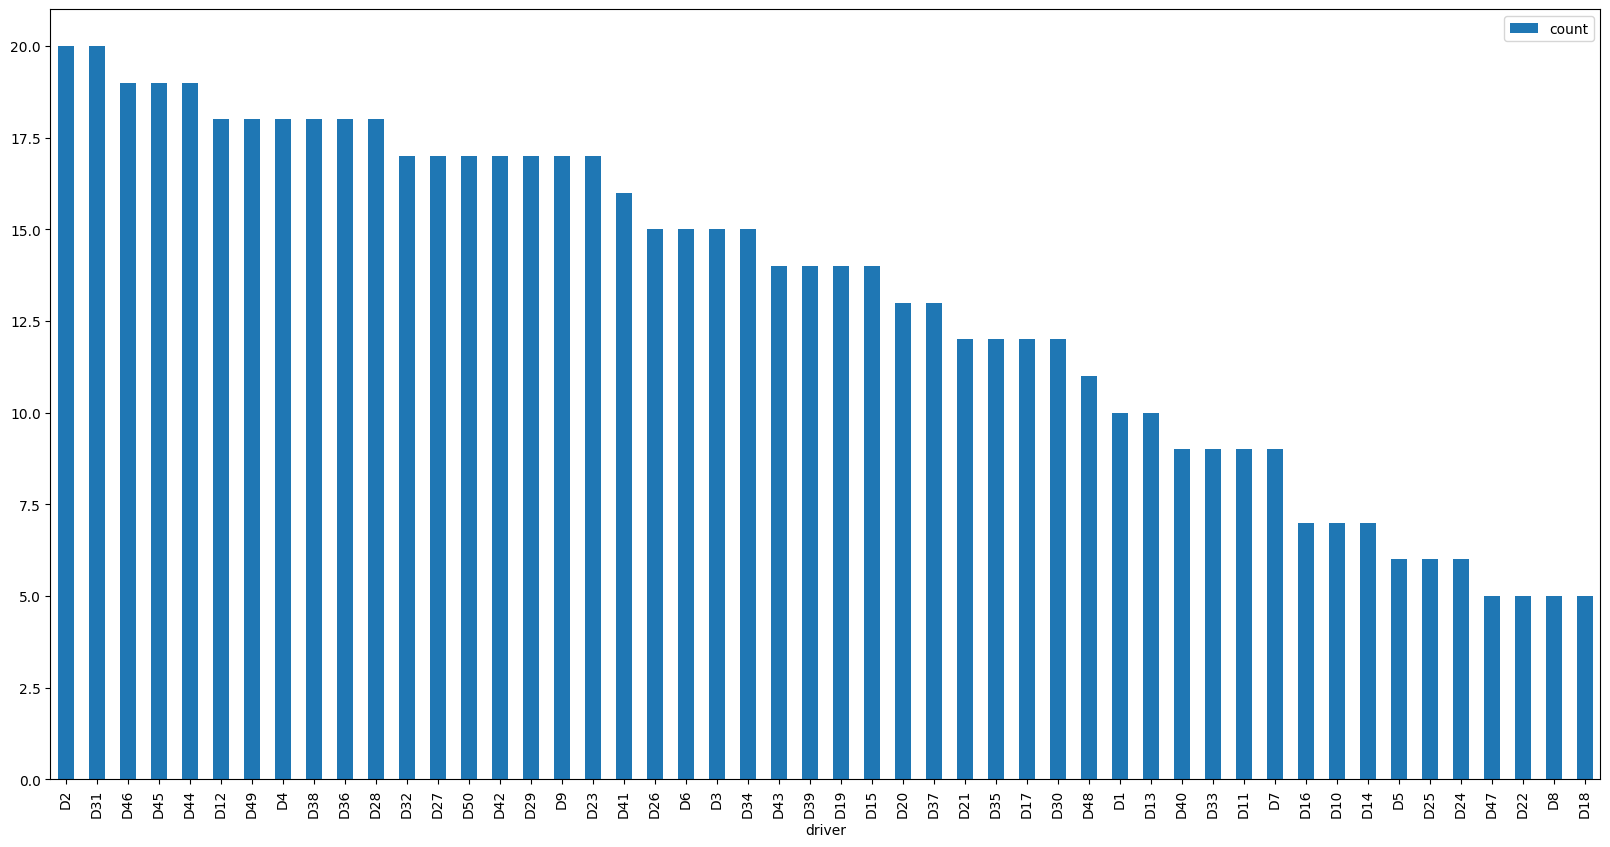

In [261]:
# Show the graph for number of actual routes for each driver and standard route using a bar chart and should be sorted in descending order
actual_routes_count.sort_values(by='count', ascending=False).plot.bar(x='driver', y='count', figsize=(20, 10))

In [262]:
# Finding the number of drivers for each standard route
standard_routes_count = actual_routes_count.groupby('sroute').size().reset_index(name='count')
standard_routes_count

,sroute,count
0,s1,1
1,s10,1
2,s11,1
3,s12,1
4,s13,1
5,s14,1
6,s15,1
7,s16,1
8,s17,1
9,s18,1


In [263]:
# Finding the number of standard routes for each driver
driver_routes_count = actual_routes_count.groupby('driver').size().reset_index(name='count')
driver_routes_count

,driver,count
0,D1,1
1,D10,1
2,D11,1
3,D12,1
4,D13,1
5,D14,1
6,D15,1
7,D16,1
8,D17,1
9,D18,1


In [264]:
import json
from collections import Counter

def route_to_string(route):
    """
    Convert a route (list of leg dictionaries) to a standardized string format.
    """
    return ' '.join(["{}-{}".format(leg['from'], leg['to']) for leg in route])

def calculate_route_statistics(driver_routes, std_route_dict):
    """
    Calculate statistics for a driver's routes.
    """
    same_varied_actual_routes = Counter()
    different_varied_actual_routes = 0
    same_std_route = 0

    for _, route_row in driver_routes.iterrows():
        std_route = std_route_dict.get(route_row['sroute'], "")
        act_route = route_to_string(route_row['route'])
        
        same_varied_actual_routes.update([act_route])
        
        if act_route == std_route:
            same_std_route += 1
        else:
            different_varied_actual_routes += 1
            
    repeated_actual_routes = sum(1 for count in same_varied_actual_routes.values() if count > 1)

    return {
        'total_actual_routes': len(driver_routes),
        'same_varied_actual_routes': repeated_actual_routes,
        'same_std_route': same_std_route,
        'different_varied_actual_routes': different_varied_actual_routes - repeated_actual_routes
    }

def analyze_driver_routes(actual_routes_df_, standard_routes_df_):
    """
    Analyze routes for all drivers.
    """
    driver_actual_routes_analysis = {}

    # Create a dictionary mapping standard route IDs to their route strings
    std_route_dict = {row['id']: route_to_string(row['route']) for _, row in standard_routes_df_.iterrows()}

    for driver_ in actual_routes_df_['driver'].unique():
        driver_routes = actual_routes_df_[actual_routes_df_['driver'] == driver_]
        driver_actual_routes_analysis[driver_] = calculate_route_statistics(driver_routes, std_route_dict)

    return driver_actual_routes_analysis

# Use the analyze_driver_routes function to get the analysis
driver_actual_routes_followed_analysis = analyze_driver_routes(actual_routes_df, standard_routes_df)

# Convert the analysis to a DataFrame
driver_actual_routes_followed_analysis_df = pd.DataFrame(driver_actual_routes_followed_analysis).T
driver_actual_routes_followed_analysis_df

,total_actual_routes,same_varied_actual_routes,same_std_route,different_varied_actual_routes
D38,18,2,0,16
D13,10,1,0,9
D19,14,2,2,10
D31,20,6,0,14
D40,9,2,3,4
D8,5,1,2,2
D5,6,1,0,5
D10,7,2,0,5
D24,6,2,0,4
D23,17,4,0,13


<Axes: >

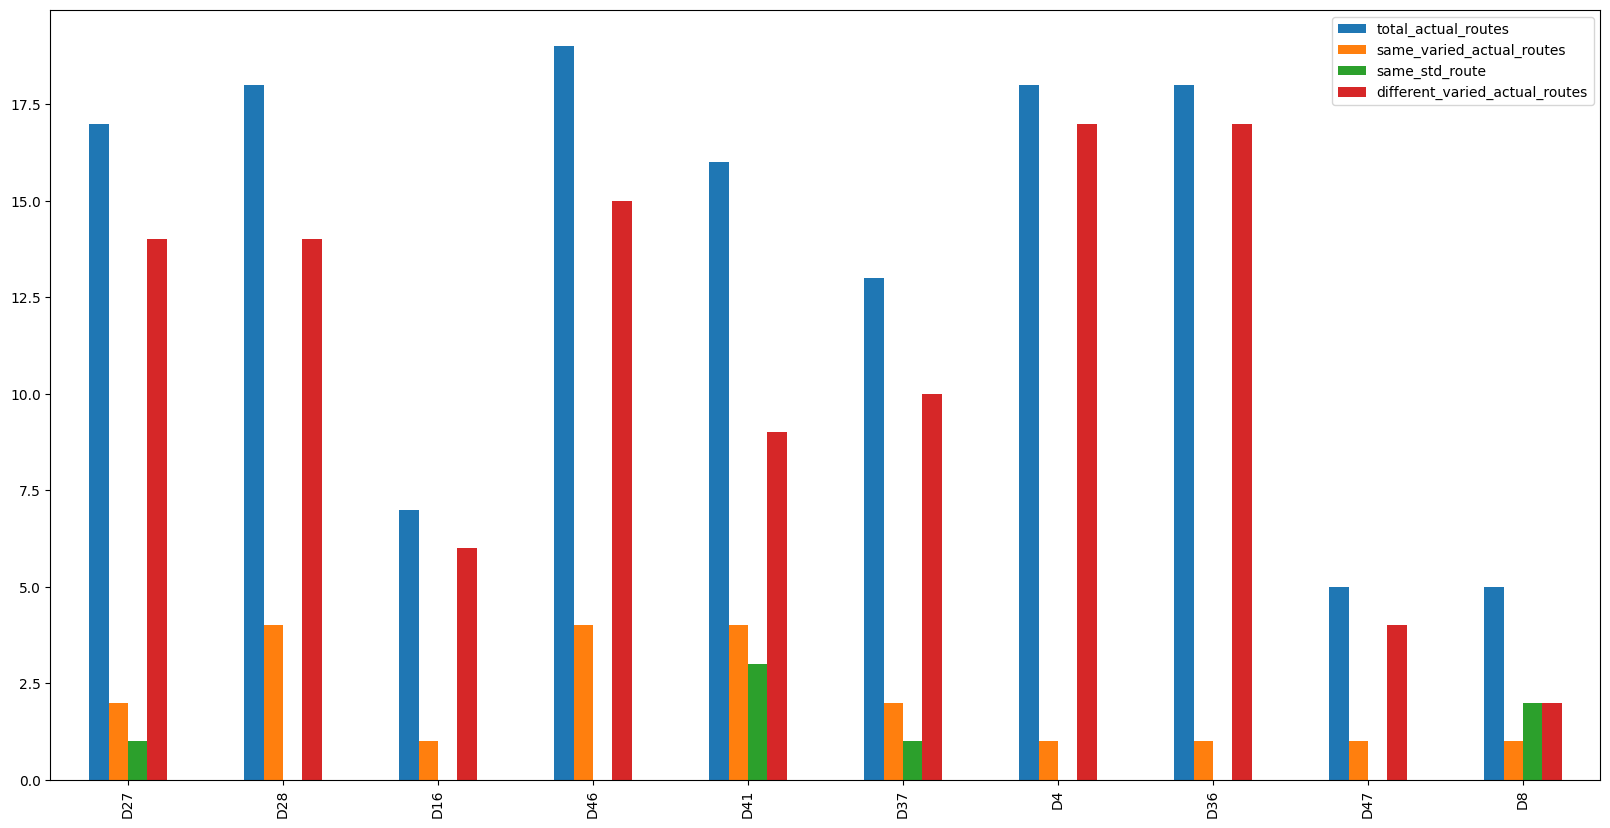

In [265]:
# Randomly plot analysis for 10 drivers
random_drivers = random.sample(list(driver_actual_routes_followed_analysis.keys()), 10)
driver_actual_routes_followed_analysis_df.loc[random_drivers].plot.bar(figsize=(20, 10))

## Route Analysis: 
By comparing the standard and actual routes, identify the common deviations made by drivers.

In [266]:
# Comparing the standard and actual routes
standard_routes_df['actual_route'] = actual_routes_df['route']
standard_routes_df.head()

,id,route,actual_route
0,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi..."
1,s2,"[{'from': 'Latina', 'to': 'Salerno', 'merchand...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi..."
2,s3,"[{'from': 'Bergamo', 'to': 'Monza', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi..."
3,s4,"[{'from': 'Venice', 'to': 'Udine', 'merchandis...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi..."
4,s5,"[{'from': 'Bologna', 'to': 'Forlì', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi..."


In [267]:
from collections import defaultdict

# Function to convert route list to a dictionary for easy comparison
def route_list_to_dict(route_list):
    return {f"{leg_['from']}-{leg_['to']}": leg_['merchandise'] for leg_ in route_list}

In [268]:
# Convert standard routes to a dictionary format
standard_routes_dict = {route['id']: route_list_to_dict(route['route']) for route in standard_routes}
standard_routes_dict

{'s1': {'Pescara-Terni': {'pens': 7, 'coca-cola': 25},
  'Terni-Rome': {'coca-cola': 30, 'bread': 32},
  'Rome-Perugia': {'pens': 30, 'honey': 18},
  'Perugia-Forlì': {'butter': 18},
  'Forlì-Bologna': {'coca-cola': 43, 'butter': 12},
  'Bologna-Prato': {'tomatoes': 4, 'bread': 15, 'coca-cola': 23}},
 's2': {'Latina-Salerno': {'milk': 2,
   'coca-cola': 38,
   'butter': 9,
   'bread': 8},
  'Salerno-Foggia': {'bread': 10, 'tomatoes': 8, 'coca-cola': 8},
  'Foggia-Bari': {'milk': 16, 'coca-cola': 35},
  'Bari-Taranto': {'honey': 8, 'coca-cola': 47}},
 's3': {'Bergamo-Monza': {'milk': 3},
  'Monza-Milan': {'tomatoes': 35, 'bread': 30},
  'Milan-Parma': {'milk': 22, 'bread': 12, 'honey': 43},
  'Parma-Brescia': {'tomatoes': 50},
  'Brescia-Verona': {'pens': 1}},
 's4': {'Venice-Udine': {'milk': 49},
  'Udine-Padova': {'tomatoes': 28},
  'Padova-Ferrara': {'butter': 8, 'bread': 42, 'pens': 20, 'honey': 32},
  'Ferrara-Reggio Emilia': {'bread': 41, 'milk': 3}},
 's5': {'Bologna-Forlì': {'co

In [269]:
# Analyzing actual routes to find deviations
deviations = defaultdict(int)
route_merchandise_comparison = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for actual_route in actual_routes:
    sroute_id = actual_route['sroute']
    actual_route_dict = route_list_to_dict(actual_route['route'])
    
    # Compare each leg of the actual route with the standard route
    for leg, merchandise in actual_route_dict.items():
        if leg not in standard_routes_dict[sroute_id]:
            # Deviation in route found 
            deviations[leg] += 1
        else:
            # Compare merchandise quantities if the route matches
            for item, quantity in merchandise.items():
                standard_quantity = standard_routes_dict[sroute_id][leg].get(item, 0)
                route_merchandise_comparison[sroute_id][leg][item] += quantity - standard_quantity

In [270]:
# Prepare data for analysis
deviation_data = dict(deviations)

In [271]:
deviation_data

{'Terni-Latina': 20,
 'Latina-Perugia': 17,
 'Terni-Naples': 5,
 'Naples-Rome': 10,
 'Foggia-Pescara': 2,
 'Perugia-Florence': 1,
 'Florence-Forlì': 4,
 'Forlì-Reggio Emilia': 9,
 'Reggio Emilia-Bologna': 8,
 'Perugia-Ferrara': 2,
 'Ferrara-Bologna': 11,
 'Perugia-Rimini': 6,
 'Rimini-Bologna': 9,
 'Rome-Ancona': 4,
 'Ancona-Forlì': 2,
 'Foggia-Naples': 14,
 'Naples-Taranto': 3,
 'Naples-Salerno': 10,
 'Foggia-Giugliano in Campania': 9,
 'Giugliano in Campania-Taranto': 5,
 'Pescara-Bari': 1,
 'Naples-Latina': 11,
 'Salerno-Pescara': 2,
 'Pescara-Foggia': 2,
 'Naples-Bari': 4,
 'Salerno-Naples': 11,
 'Naples-Foggia': 5,
 'Giugliano in Campania-Bari': 3,
 'Bari-Messina': 1,
 'Messina-Taranto': 10,
 'Bergamo-Piacenza': 5,
 'Piacenza-Monza': 1,
 'Monza-Piacenza': 3,
 'Piacenza-Milan': 2,
 'Milan-Reggio Emilia': 1,
 'Reggio Emilia-Parma': 15,
 'Parma-Bologna': 10,
 'Bologna-Brescia': 4,
 'Novara-Bergamo': 16,
 'Parma-Modena': 17,
 'Modena-Brescia': 11,
 'Brescia-Padova': 11,
 'Padova-Veron

In [272]:
merchandise_comparison_data = {route: dict(legs) for route, legs in route_merchandise_comparison.items()}
merchandise_comparison_data

{'s1': {'Pescara-Terni': defaultdict(int, {'pens': -42, 'coca-cola': 19}),
  'Perugia-Forlì': defaultdict(int, {'butter': -40}),
  'Forlì-Bologna': defaultdict(int, {'coca-cola': -160, 'butter': 29}),
  'Bologna-Prato': defaultdict(int,
              {'tomatoes': 35, 'bread': 13, 'coca-cola': -168}),
  'Rome-Perugia': defaultdict(int, {'pens': -21, 'honey': -17}),
  'Terni-Rome': defaultdict(int, {'coca-cola': 2, 'bread': -1})},
 's2': {'Latina-Salerno': defaultdict(int,
              {'milk': 15, 'coca-cola': -34, 'butter': -6, 'bread': 1}),
  'Salerno-Foggia': defaultdict(int,
              {'bread': 16, 'tomatoes': 16, 'coca-cola': -8}),
  'Foggia-Bari': defaultdict(int, {'milk': 0, 'coca-cola': 0}),
  'Bari-Taranto': defaultdict(int, {'honey': -4, 'coca-cola': -11})},
 's3': {'Brescia-Verona': defaultdict(int, {'pens': 3}),
  'Bergamo-Monza': defaultdict(int, {'milk': 47}),
  'Monza-Milan': defaultdict(int, {'tomatoes': -57, 'bread': -73}),
  'Milan-Parma': defaultdict(int, {'milk'

In [273]:
# Correcting the function to create a new recommended route
def create_recommended_route(standard_route_id, standard_routes_dict_, deviations_, merchandise_diff):
    # Access the route details from the dictionary
    standard_route = standard_routes_dict_[standard_route_id]
    
    new_route = []
    for leg_key, merchandise_ in standard_route.items():
        print("leg_key: ", leg_key)
        # Check if the leg is a common deviation, if so, skip it
        if deviations_.get(leg_key, 0) > 0:
            continue
            
        # Extract 'from' and 'to' cities from the leg key
        from_city, to_city = leg_key.split('-')
        
        # Adjust merchandise quantities based on historical data
        adjusted_merchandise = {
            item_: max(0, qty + merchandise_diff.get(leg_key, {}).get(item_, 0))
            for item_, qty in merchandise_.items()
        }
        
        # Add the leg to the new route
        new_route.append(
            {"from": from_city, "to": to_city, "merchandise": adjusted_merchandise}
        )
        
    return new_route

In [274]:
# Create recommended standard routes
rec_standard_routes = []

for route_id in standard_routes_dict.keys():
    rec_route = create_recommended_route(
        route_id, standard_routes_dict, deviation_data, 
        merchandise_comparison_data.get(route_id, {})
    )
    
    if rec_route:  # Only add the route if it has at least one leg
        rec_standard_routes.append({"id": route_id, "route": rec_route})

leg_key:  Pescara-Terni
leg_key:  Terni-Rome
leg_key:  Rome-Perugia
leg_key:  Perugia-Forlì
leg_key:  Forlì-Bologna
leg_key:  Bologna-Prato
leg_key:  Latina-Salerno
leg_key:  Salerno-Foggia
leg_key:  Foggia-Bari
leg_key:  Bari-Taranto
leg_key:  Bergamo-Monza
leg_key:  Monza-Milan
leg_key:  Milan-Parma
leg_key:  Parma-Brescia
leg_key:  Brescia-Verona
leg_key:  Venice-Udine
leg_key:  Udine-Padova
leg_key:  Padova-Ferrara
leg_key:  Ferrara-Reggio Emilia
leg_key:  Bologna-Forlì
leg_key:  Forlì-Prato
leg_key:  Prato-Livorno
leg_key:  Livorno-Parma
leg_key:  Parma-Brescia
leg_key:  Brescia-Bergamo
leg_key:  Bergamo-Piacenza
leg_key:  Rimini-Forlì
leg_key:  Forlì-Ferrara
leg_key:  Ferrara-Modena
leg_key:  Modena-Reggio Emilia
leg_key:  Reggio Emilia-Piacenza
leg_key:  Piacenza-Parma
leg_key:  Turin-Genoa
leg_key:  Genoa-Piacenza
leg_key:  Piacenza-Bergamo
leg_key:  Bergamo-Milan
leg_key:  Milan-Parma
leg_key:  Parma-Verona
leg_key:  Verona-Padova
leg_key:  Padova-Bologna
leg_key:  Bologna-For

In [275]:
rec_standard_routes

[{'id': 's1',
  'route': [{'from': 'Perugia', 'to': 'Forlì', 'merchandise': {'butter': 0}},
   {'from': 'Bologna',
    'to': 'Prato',
    'merchandise': {'tomatoes': 39, 'bread': 28, 'coca-cola': 0}}]},
 {'id': 's4',
  'route': [{'from': 'Venice', 'to': 'Udine', 'merchandise': {'milk': 0}}]},
 {'id': 's5',
  'route': [{'from': 'Livorno', 'to': 'Parma', 'merchandise': {'milk': 4}}]},
 {'id': 's7',
  'route': [{'from': 'Turin',
    'to': 'Genoa',
    'merchandise': {'coca-cola': 39, 'milk': 6, 'honey': 7}},
   {'from': 'Genoa', 'to': 'Piacenza', 'merchandise': {'coca-cola': 5}}]},
 {'id': 's9',
  'route': [{'from': 'Bologna',
    'to': 'Prato',
    'merchandise': {'tomatoes': 20, 'coca-cola': 6}}]},
 {'id': 's10',
  'route': [{'from': 'Taranto', 'to': 'Salerno', 'merchandise': {'pens': 2}}]},
 {'id': 's12',
  'route': [{'from': 'Siracusa',
    'to': 'Messina',
    'merchandise': {'pens': 45, 'butter': 0}}]},
 {'id': 's14',
  'route': [{'from': 'Genoa',
    'to': 'Milan',
    'merchandise

In [276]:
# # Convert the recommended routes to JSON format
# rec_standard_json = json.dumps(rec_standard_routes, indent=4)
# # Save the recommended routes to a file
# rec_standard_filename = '/mnt/data/recStandard.json'
# with open(rec_standard_filename, 'w') as file:
#     file.write(rec_standard_json)
# 
# rec_standard_filename

In [277]:
def find_cities_in_route(x):
    cities_ = [city['from'] + ' ' + city['to'] for city in x]
    cities_ = ' '.join(cities_)
    cities_ = set([city for city in cities_.split(' ')])
    return cities_

def create_shingles(route):
    """
    Create shingles from a list of trips
    """
    return find_cities_in_route(route)

In [278]:
# Create shingles from the standard data
standard_shingles = []
for route in standard_routes_df['route']:
    standard_shingles.append(create_shingles(route))  # 3 is the shingle size

In [279]:
standard_shingles

[{'Bologna', 'Forlì', 'Perugia', 'Pescara', 'Prato', 'Rome', 'Terni'},
 {'Bari', 'Foggia', 'Latina', 'Salerno', 'Taranto'},
 {'Bergamo', 'Brescia', 'Milan', 'Monza', 'Parma', 'Verona'},
 {'Emilia', 'Ferrara', 'Padova', 'Reggio', 'Udine', 'Venice'},
 {'Bergamo',
  'Bologna',
  'Brescia',
  'Forlì',
  'Livorno',
  'Parma',
  'Piacenza',
  'Prato'},
 {'Emilia',
  'Ferrara',
  'Forlì',
  'Modena',
  'Parma',
  'Piacenza',
  'Reggio',
  'Rimini'},
 {'Bergamo',
  'Genoa',
  'Milan',
  'Padova',
  'Parma',
  'Piacenza',
  'Turin',
  'Verona'},
 {'Bologna', 'Florence', 'Forlì', 'Modena', 'Padova'},
 {'Bologna', 'Modena', 'Novara', 'Parma', 'Piacenza', 'Prato'},
 {'Foggia', 'Naples', 'Pescara', 'Salerno', 'Taranto'},
 {'Emilia', 'Florence', 'Forlì', 'Modena', 'Reggio', 'Rimini'},
 {'Messina', 'Siracusa', 'Taranto'},
 {'Bergamo',
  'Brescia',
  'Emilia',
  'Livorno',
  'Milan',
  'Monza',
  'Reggio',
  'Verona'},
 {'Genoa', 'Milan', 'Monza', 'Novara', 'Piacenza'},
 {'Bergamo', 'Brescia', 'Trento

In [280]:
standard_routes_df['route_shingles'] = pd.Series(standard_shingles)
standard_routes_df.head()

,id,route,actual_route,route_shingles
0,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar..."
1,s2,"[{'from': 'Latina', 'to': 'Salerno', 'merchand...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Latina, Salerno, Foggia, Bari, Taranto}"
2,s3,"[{'from': 'Bergamo', 'to': 'Monza', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Milan, Verona, Parma, Bergamo, Monza, Brescia}"
3,s4,"[{'from': 'Venice', 'to': 'Udine', 'merchandis...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Venice, Ferrara, Reggio, Padova, Emilia, Udine}"
4,s5,"[{'from': 'Bologna', 'to': 'Forlì', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Livorno, Piacenza, Bologna, Par..."


In [282]:
# Create shingles from the actual data
actual_shingles = []
for route in actual_routes_df['route']:
    actual_shingles.append(create_shingles(route))  # 3 is the shingle size

actual_routes_df['route_shingles'] = pd.Series(actual_shingles)
actual_routes_df.head()

,id,driver,route,sroute,route_shingles
0,a61038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni..."
1,a64038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni..."
2,a66586,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni..."
3,a4774,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni..."
4,a75494,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni..."


In [283]:
# build a set of all shingles
all_shingles = set()
for shingles in standard_shingles:
    all_shingles.update(shingles)
    
for shingles in actual_shingles:
    all_shingles.update(shingles)
    
all_shingles = list(all_shingles)
all_shingles

['Modena',
 'Prato',
 'Latina',
 'Forlì',
 'Padova',
 'Campania',
 'Parma',
 'Ancona',
 'Bari',
 'Pescara',
 'Siracusa',
 'Venice',
 'Trento',
 'Ravenna',
 'Calabria',
 'Reggio',
 'Salerno',
 'Livorno',
 'Bolzano',
 'Genoa',
 'Perugia',
 'Cagliari',
 'di',
 'Giugliano',
 'Monza',
 'Taranto',
 'Catania',
 'Rimini',
 'Milan',
 'Verona',
 'Bologna',
 'Naples',
 'Sassari',
 'Vicenza',
 'Terni',
 'Trieste',
 'Ferrara',
 'Novara',
 'Emilia',
 'Foggia',
 'Piacenza',
 'Messina',
 'in',
 'Bergamo',
 'Udine',
 'Florence',
 'Turin',
 'Palermo',
 'Rome',
 'Brescia']

In [284]:
len(all_shingles)

50

In [285]:
# build vocabulary
def build_vocab(shingle_sets: list):
    # convert list of shingle sets into single set
    full_set = {item_ for set_ in shingle_sets for item_ in set_}
    vocab_ = {}
    for i, shingle in enumerate(list(full_set)):
        vocab_[shingle] = i
        
    return vocab_

In [286]:
vocab = build_vocab(standard_shingles + actual_shingles)
vocab

{'Modena': 0,
 'Prato': 1,
 'Latina': 2,
 'Forlì': 3,
 'Padova': 4,
 'Campania': 5,
 'Parma': 6,
 'Ancona': 7,
 'Bari': 8,
 'Pescara': 9,
 'Siracusa': 10,
 'Venice': 11,
 'Trento': 12,
 'Ravenna': 13,
 'Calabria': 14,
 'Reggio': 15,
 'Salerno': 16,
 'Livorno': 17,
 'Bolzano': 18,
 'Genoa': 19,
 'Perugia': 20,
 'Cagliari': 21,
 'di': 22,
 'Giugliano': 23,
 'Monza': 24,
 'Taranto': 25,
 'Catania': 26,
 'Rimini': 27,
 'Milan': 28,
 'Verona': 29,
 'Bologna': 30,
 'Naples': 31,
 'Sassari': 32,
 'Vicenza': 33,
 'Terni': 34,
 'Trieste': 35,
 'Ferrara': 36,
 'Novara': 37,
 'Emilia': 38,
 'Foggia': 39,
 'Piacenza': 40,
 'Messina': 41,
 'in': 42,
 'Bergamo': 43,
 'Udine': 44,
 'Florence': 45,
 'Turin': 46,
 'Palermo': 47,
 'Rome': 48,
 'Brescia': 49}

In [287]:
def one_hot(shingles_: set, vocab_: dict):
    vec = np.zeros(len(vocab_))
    
    for shingle in shingles_:
        idx = vocab_[shingle]
        vec[idx] = 1
    
    return vec

In [288]:
standard_routes_df['One_hot_encoded'] = standard_routes_df['route_shingles'].apply(lambda x: one_hot(x, vocab))
actual_routes_df['One_hot_encoded'] = actual_routes_df['route_shingles'].apply(lambda x: one_hot(x, vocab))

In [289]:
standard_routes_df.head()

,id,route,actual_route,route_shingles,One_hot_encoded
0,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,s2,"[{'from': 'Latina', 'to': 'Salerno', 'merchand...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Latina, Salerno, Foggia, Bari, Taranto}","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,s3,"[{'from': 'Bergamo', 'to': 'Monza', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Milan, Verona, Parma, Bergamo, Monza, Brescia}","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,s4,"[{'from': 'Venice', 'to': 'Udine', 'merchandis...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Venice, Ferrara, Reggio, Padova, Emilia, Udine}","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,s5,"[{'from': 'Bologna', 'to': 'Forlì', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Livorno, Piacenza, Bologna, Par...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [290]:
actual_routes_df.head()

,id,driver,route,sroute,route_shingles,One_hot_encoded
0,a61038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,a64038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,a66586,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,a4774,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,a75494,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...",s1,"{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [291]:
def jaccard_similarity(set1, set2):
    intersection = 0
    union = 0
    for i,j in zip(set1,set2):
        if (i == j) and (i == 1):
            intersection += 1
            union += 1
        elif i == 1 or j == 1:
            union += 1
    
    return intersection / union if union > 0 else 0.0

In [292]:
print(f'Length of vacab : {len(vocab)}')
print('First 10 items in vocab:\n')
print([i for i in vocab.items()][:10])

print('Shape of our One hot encoded routes: {}'.format(standard_routes_df.loc[0, 'One_hot_encoded'].shape))

print('First 5 rows of our One hot encoded routes:\n {}'.format(standard_routes_df.loc[0:5, 'One_hot_encoded']))

print('sum of first row: \n{}'.format(standard_routes_df.loc[0, 'One_hot_encoded'].sum()))

print('Jaccard Similarity between same route: {}'.format(
    jaccard_similarity(standard_routes_df.loc[0, 'One_hot_encoded'], actual_routes_df.loc[0, 'One_hot_encoded'])))

Length of vacab : 50
First 10 items in vocab:

[('Modena', 0), ('Prato', 1), ('Latina', 2), ('Forlì', 3), ('Padova', 4), ('Campania', 5), ('Parma', 6), ('Ancona', 7), ('Bari', 8), ('Pescara', 9)]
Shape of our One hot encoded routes: (50,)
First 5 rows of our One hot encoded routes:
 0    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
5    [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
Name: One_hot_encoded, dtype: object
sum of first row: 
7.0
Jaccard Similarity between same route: 0.75


In [293]:
# rename the column 'id' to 'sroute' in standard_routes_df
standard_routes_df.rename(columns={'id': 'sroute'}, inplace=True)

In [294]:
# Merge DataFrames on the ID column
merged_df = pd.merge(standard_routes_df, actual_routes_df, on='sroute', how='inner')
merged_df.head()

,sroute,route_x,actual_route,route_shingles_x,One_hot_encoded_x,id,driver,route_y,route_shingles_y,One_hot_encoded_y
0,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a61038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a64038,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a66586,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a4774,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,s1,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Forlì, Bologna, Perugia, Terni, Pescar...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a75494,D38,"[{'from': 'Pescara', 'to': 'Terni', 'merchandi...","{Prato, Latina, Forlì, Bologna, Perugia, Terni...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [295]:
def create_driver_profile(merged_df_):
    unique_drivers = merged_df_['driver'].unique()
    
    driver_profiles_ = []
    for driver_ in unique_drivers:
        driver_df = merged_df_[merged_df_['driver'] == driver_]
        driver_df['difference_in_route'] = driver_df['One_hot_encoded_y'] - driver_df['One_hot_encoded_x']
        profile = pd.DataFrame(driver_df['difference_in_route'].tolist()).sum().tolist()
        driver_profiles_.append(np.array(profile))

    return driver_profiles_

In [296]:
driver_profiles = create_driver_profile(merged_df)
driver_profiles

C:\Users\adnan\AppData\Local\Temp\ipykernel_25228\3285339571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_df['difference_in_route'] = driver_df['One_hot_encoded_y'] - driver_df['One_hot_encoded_x']
C:\Users\adnan\AppData\Local\Temp\ipykernel_25228\3285339571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_df['difference_in_route'] = driver_df['One_hot_encoded_y'] - driver_df['One_hot_encoded_x']
C:\Users\adnan\AppData\Local\Temp\ipykernel_25228\3285339571.py:7: SettingWithCopyWarnin

[array([  0.,   0.,  12.,  -3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,  -1.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0., -12.,   0.]),
 array([ 0.,  0., -1.,  0.,  0.,  6.,  0.,  0., -6.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([11.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 4.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         4.,  0.,

In [297]:
from scipy.spatial.distance import cosine

In [298]:
driver_max_routes = {}
for driver_number, driver in enumerate(driver_profiles):
    route_similarities = []

    for index, One_hot_encoded in enumerate(standard_routes_df['One_hot_encoded']):
        cosine_distance = cosine(driver, One_hot_encoded)
        cosine_similarity = 1 - cosine_distance
        route_similarities.append((index, cosine_similarity))

    # Sort based on similarity and pick top 5
    max_five_routes = sorted(route_similarities, key=lambda x: x[1], reverse=True)[:5]

    driver_max_routes[driver_number] = max_five_routes

In [299]:
driver_max_routes

{0: [(18, 0.34668762264076824),
  (1, 0.3291402943021917),
  (42, 0.3004626062886657),
  (9, 0.075955452531275),
  (35, 0.0716114874039433)],
 1: [(17, 0.7019464566889481),
  (36, 0.672698687660242),
  (49, 0.6142031496028296),
  (21, 0.5628201018672558),
  (25, 0.5471756551645828)],
 2: [(7, 0.5369202722440214),
  (8, 0.5114492951128095),
  (29, 0.46138341907847646),
  (26, 0.29834542214913884),
  (31, 0.2870976630345343)],
 3: [(19, 0.3084763486195622),
  (8, 0.27399831217559556),
  (39, 0.27013510133444885),
  (31, 0.2684624220856098),
  (20, 0.26101844883193714)],
 4: [(41, 0.608780777528101),
  (29, 0.6083303292403595),
  (10, 0.5619514869490163),
  (45, 0.5619514869490163),
  (32, 0.5353033790313109)],
 5: [(39, 0.50709255283711),
  (2, 0.4629100498862757),
  (12, 0.40089186286863654),
  (23, 0.40089186286863654),
  (13, 0.3380617018914066)],
 6: [(45, 0.5084751798731266),
  (16, 0.4707565417620041),
  (3, 0.4622501635210243),
  (10, 0.4622501635210243),
  (41, 0.4622501635210243